In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font",size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

In [2]:
url = "https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv"
data = pd.read_csv(url,header=0)
data = data.dropna() #why are we doing this? wouldnt it be better to fill in?
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


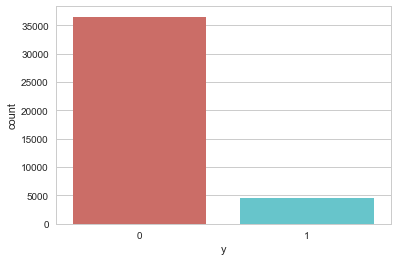

In [4]:
sns.countplot(x="y",data=data,palette='hls')
plt.show()

In [5]:
data.isnull().sum() #didnt we take out the missing values before?

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

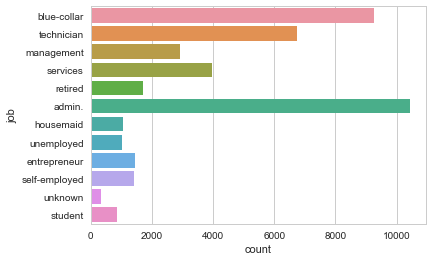

In [6]:
sns.countplot(y='job',data=data)
plt.show()

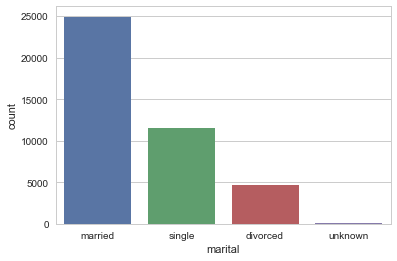

In [7]:
sns.countplot(x='marital',data=data)
plt.show()

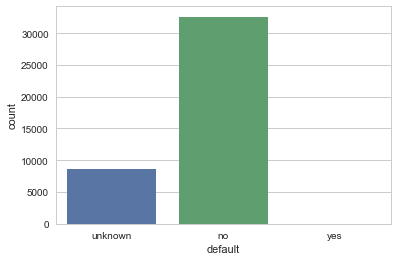

In [8]:
sns.countplot(x='default',data=data)
plt.show()

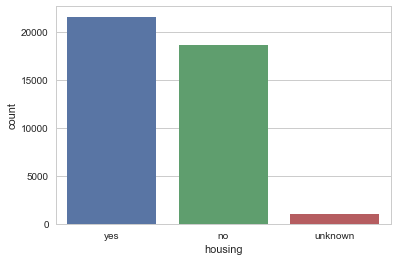

In [9]:
sns.countplot(x='housing',data=data)
plt.show()

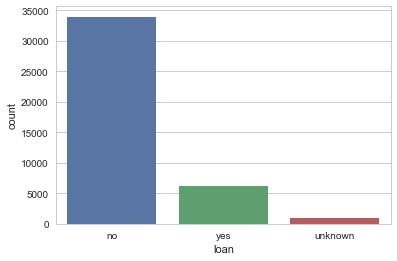

In [10]:
sns.countplot(x='loan',data=data)
plt.show()

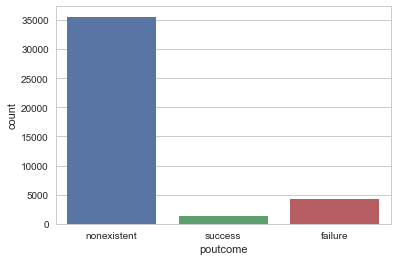

In [11]:
sns.countplot(x='poutcome',data=data)
plt.show()

In [12]:
data.drop(data.columns[[0,3,7,8,9,10,11,12,13,15,16,17,18,19]],axis=1,inplace=True)
data.head()

,job,marital,default,housing,loan,poutcome,y
0,blue-collar,married,unknown,yes,no,nonexistent,0
1,technician,married,no,no,no,nonexistent,0
2,management,single,no,yes,no,success,1
3,services,married,no,no,no,nonexistent,0
4,retired,married,no,yes,no,success,1


In [13]:
data2=pd.get_dummies(data,columns=['job','marital','default','housing','loan','poutcome'])

In [14]:
data2.drop(data2.columns[[12,16,18,21,24]],axis=1,inplace=True)
data2.head()


,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,1,1,0,0,1,1,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,1,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1


In [15]:
data2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

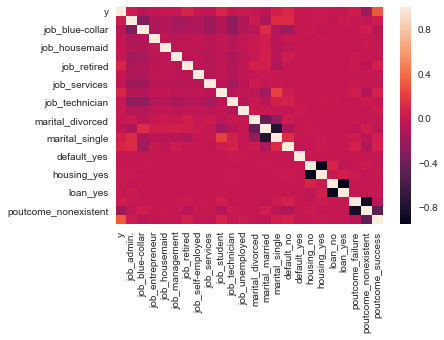

In [16]:
sns.heatmap(data2.corr())
plt.show()

In [17]:
X=data2.iloc[:,1:]
y=data2.iloc[:,0]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [18]:
X_train.shape

(30891, 23)

In [19]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[9046  110]
 [ 912  229]]


In [21]:
print('Accuracy of logistic regression classifier on test set:{:.2f}'.format(classifier.score(X_test,y_test)))
# I guess it does accuracy automatically?, go over this

Accuracy of logistic regression classifier on test set:0.90


In [22]:
classifier.score(X_test,y_test)

0.90074779061862675

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95      9156
          1       0.68      0.20      0.31      1141

avg / total       0.88      0.90      0.88     10297



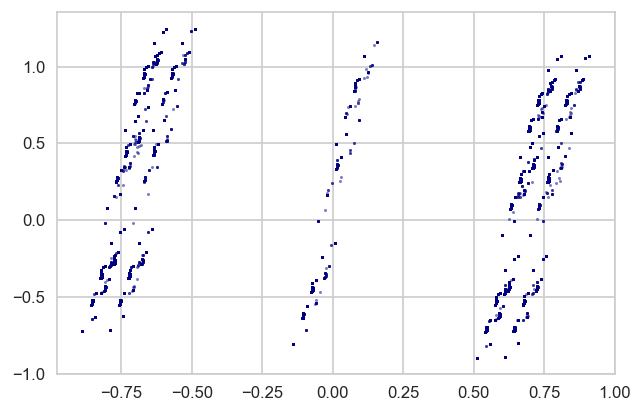

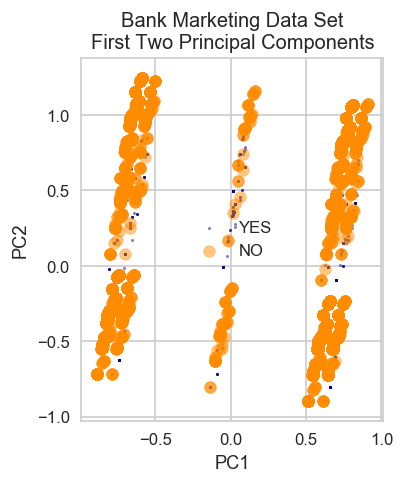

In [26]:
from sklearn.decomposition import PCA
X=data2.iloc[:,1:]
y=data2.iloc[:,0]
pca = PCA(n_components=2).fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(pca,y,random_state=0)
#go over PCA
plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0],pca[y.values==0,1],alpha=0.5,label='YES',s=2,color='navy')
plt.scatter(pca[y.values==1,0],pca[y.values==1,1],alpha=0.5,label='NO',color='darkorange')
plt.legend()
plt.title('Bank Marketing Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

In [27]:
def plot_bank(X, y, fitted_model):
plt.figure(figsize=(9.8,5), dpi=100)
    
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)
mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.8, label='YES', s=5, color='navy')
        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.8, label='NO', s=5, color='darkorange')
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.legend()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)
model = LogisticRegression()
model.fit(X_train,y_train)
plot_bank(X_test, y_test, model)
plt.show()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 29)